<a href="https://colab.research.google.com/github/sarmadsaleem333/Customer-Segmentation-/blob/main/Customer_Segmentation_(K_Means_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
 df=pd.read_csv("/content/Mall_Customers.csv")
 df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.rename(columns={"Annual Income (k$)":"AnnualIncome","Spending Score (1-100)":"SpendingScore"},inplace=True)
df.head()


,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


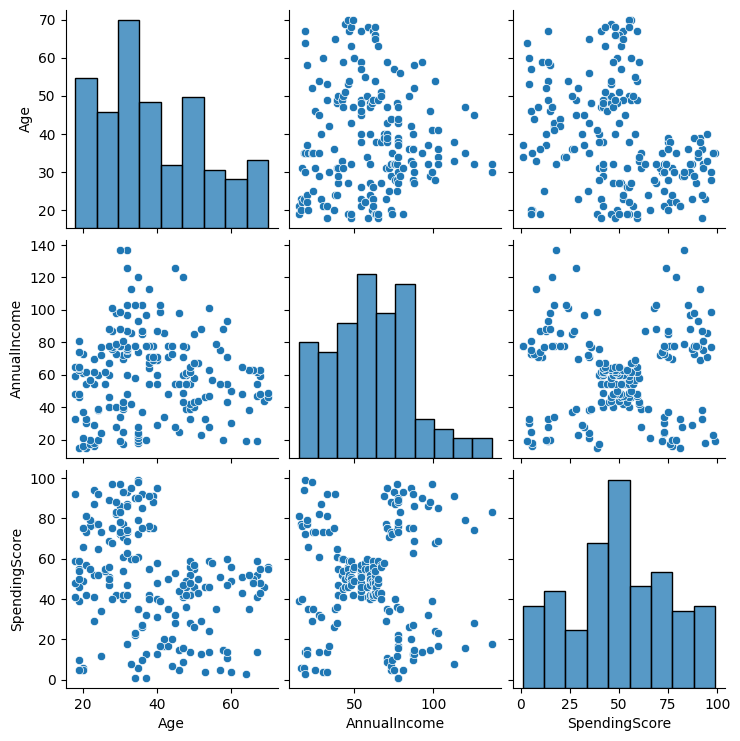

In [13]:
sns.pairplot(df[["Age"	,"AnnualIncome",	"SpendingScore"]])

Text(0.5, 1.0, 'Annual Income Vs Spending Score')

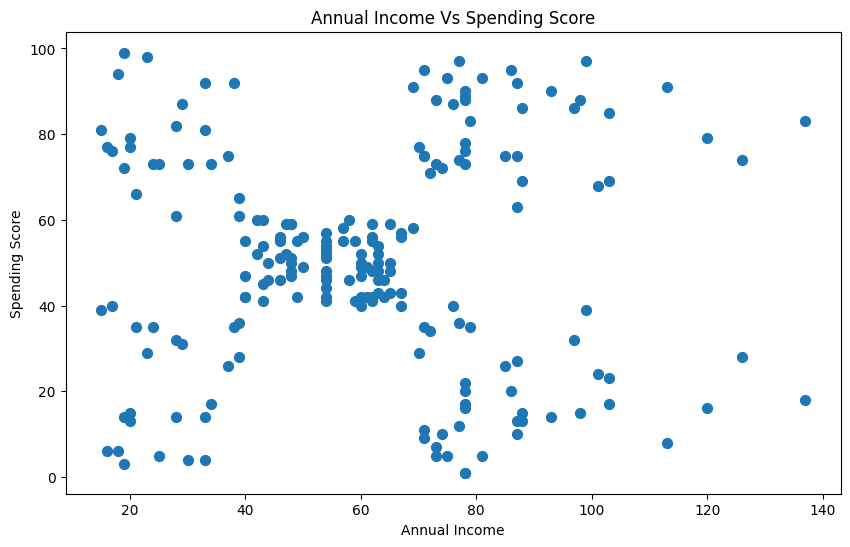

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df["AnnualIncome"],df["SpendingScore"],s=50)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income Vs Spending Score")

In [16]:
from sklearn.cluster import KMeans


X=df[ ["AnnualIncome","SpendingScore"]]
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


Text(0.5, 1.0, 'Elbow Method ')

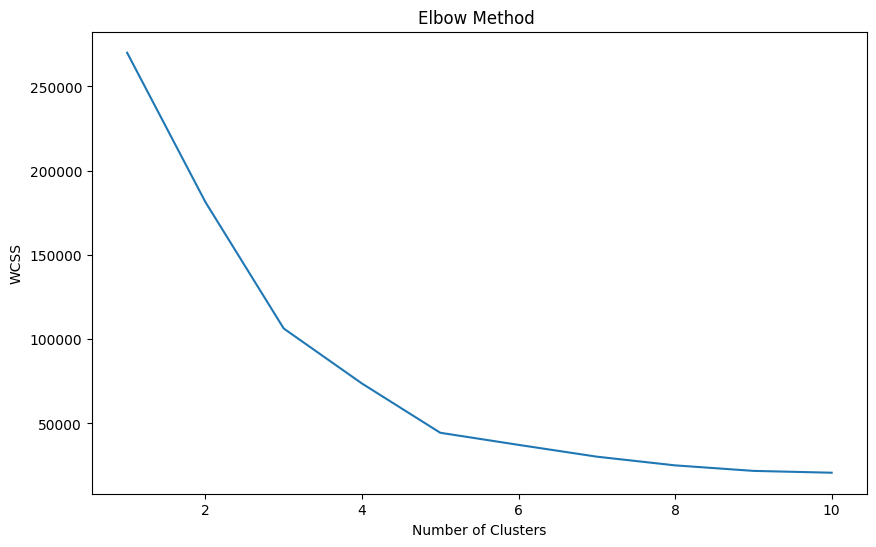

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method ")

In [21]:
 kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
 y_kmeans=kmeans.fit_predict(X)
 df[ 'Cluster']=y_kmeans

In [22]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


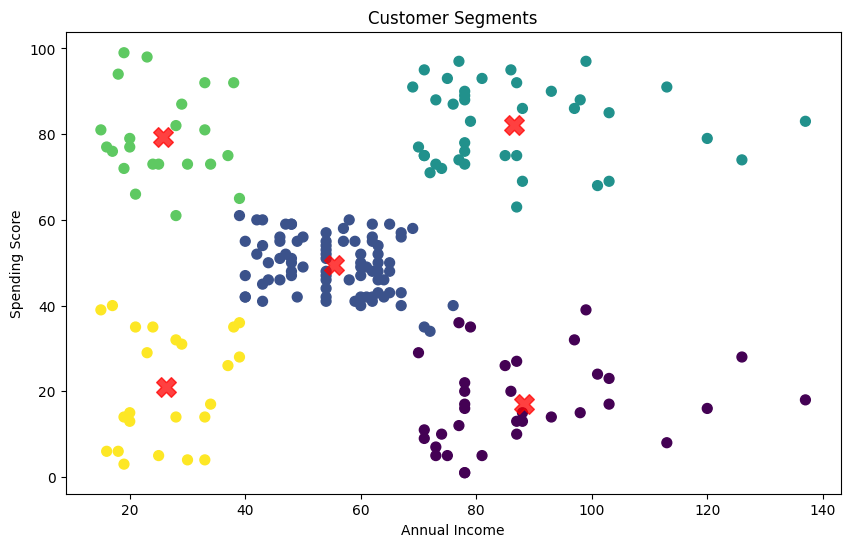

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75,marker='X')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

Text(0.5, 1.0, 'Age Vs Spending Score')

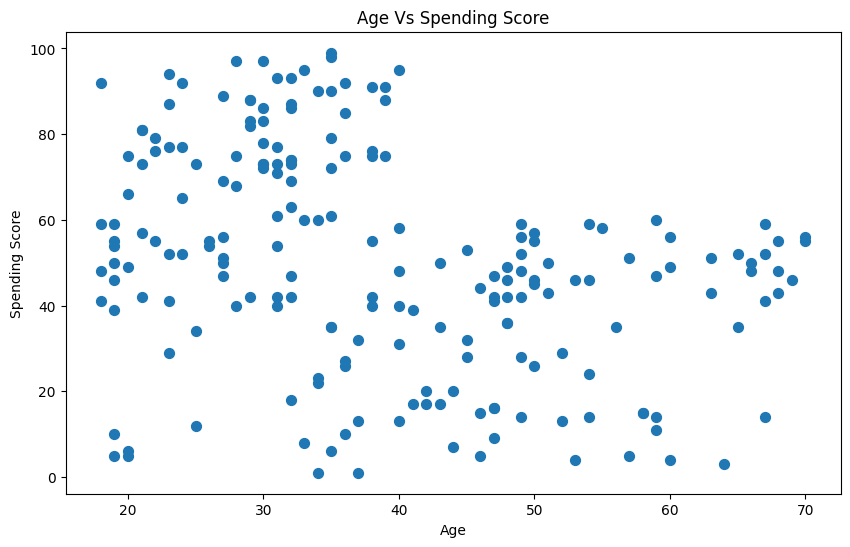

In [27]:
##now analyzing age vs spending score

plt.figure(figsize=(10,6))
plt.scatter(df["Age"],df["SpendingScore"],s=50)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age Vs Spending Score")


In [28]:
X=df[ ["Age","SpendingScore"]]
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method ')

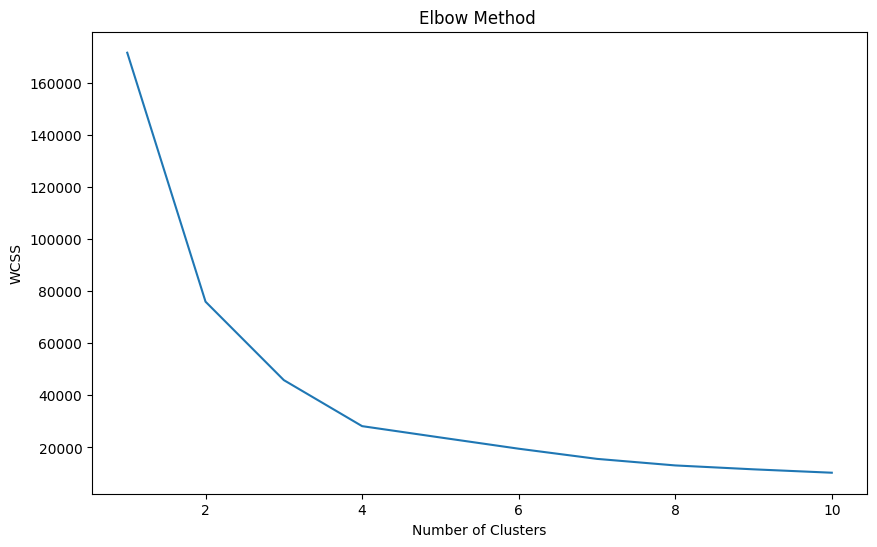

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method ")

In [31]:
 kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
 y_kmeans=kmeans.fit_predict(X)
 df[ 'Cluster2']=y_kmeans

In [32]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster,Cluster2
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,4,2


In [33]:
df.tail()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster,Cluster2
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,0,0
199,200,Male,30,137,83,2,1


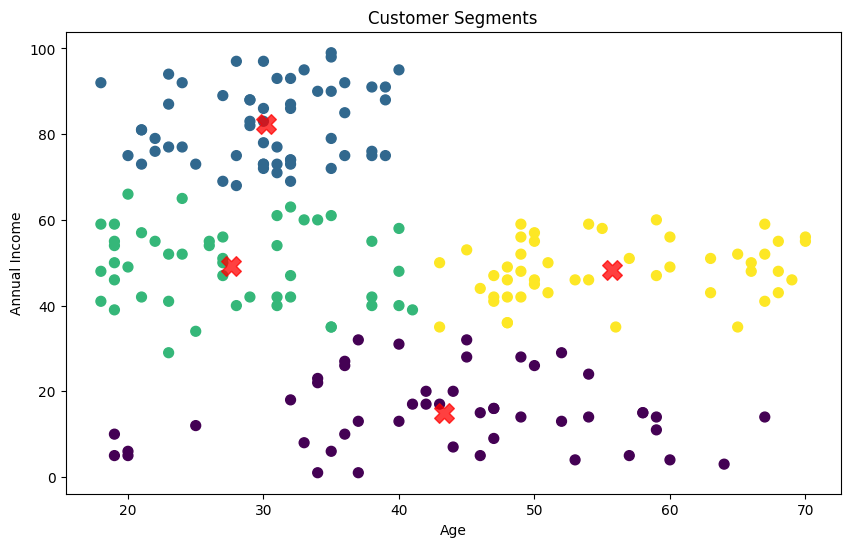

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75,marker='X')
plt.ylabel("Annual Income")
plt.xlabel("Age")
plt.title("Customer Segments")
plt.show()